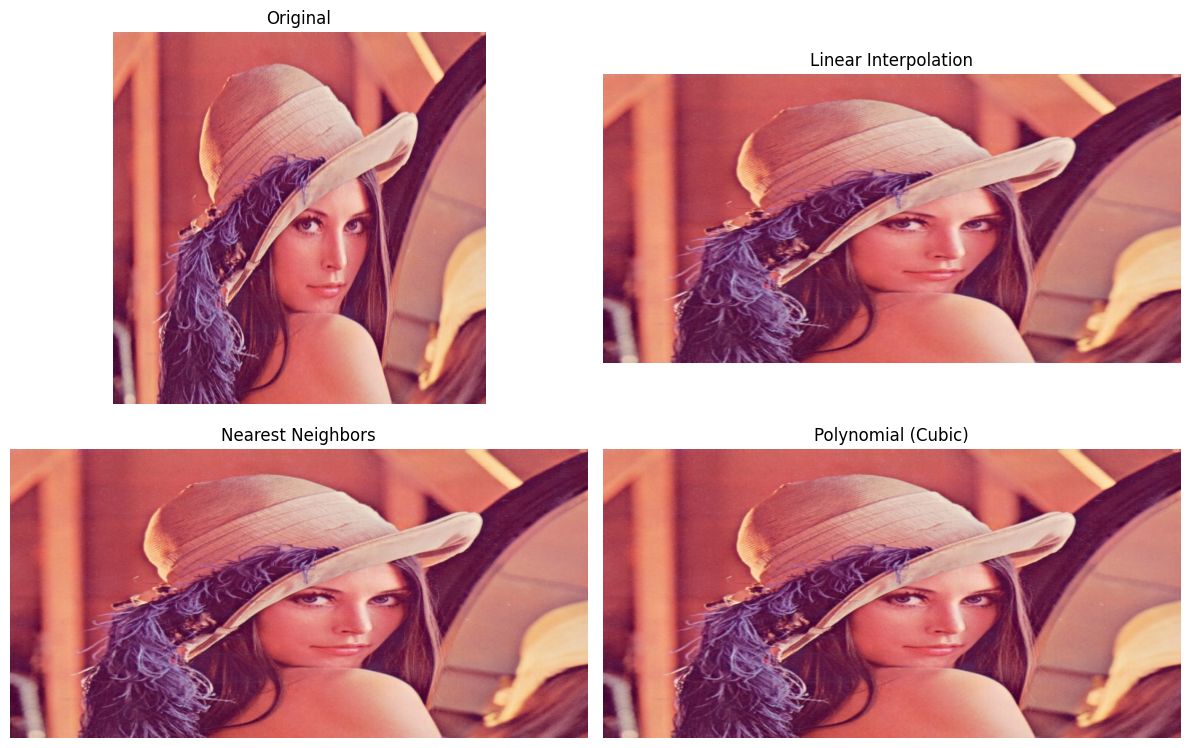

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/WhatsApp Image 2025-01-14 at 11.16.12.jpeg'
image = cv2.imread(image_path)


image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

h,w,_=image.shape
new_width = int(2*w)
new_height = int(h)


resized_linear = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
resized_nearest = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_NEAREST)
resized_cubic = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)


titles = ['Original', 'Linear Interpolation', 'Nearest Neighbors', 'Polynomial (Cubic)']
images = [image, resized_linear, resized_nearest, resized_cubic]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

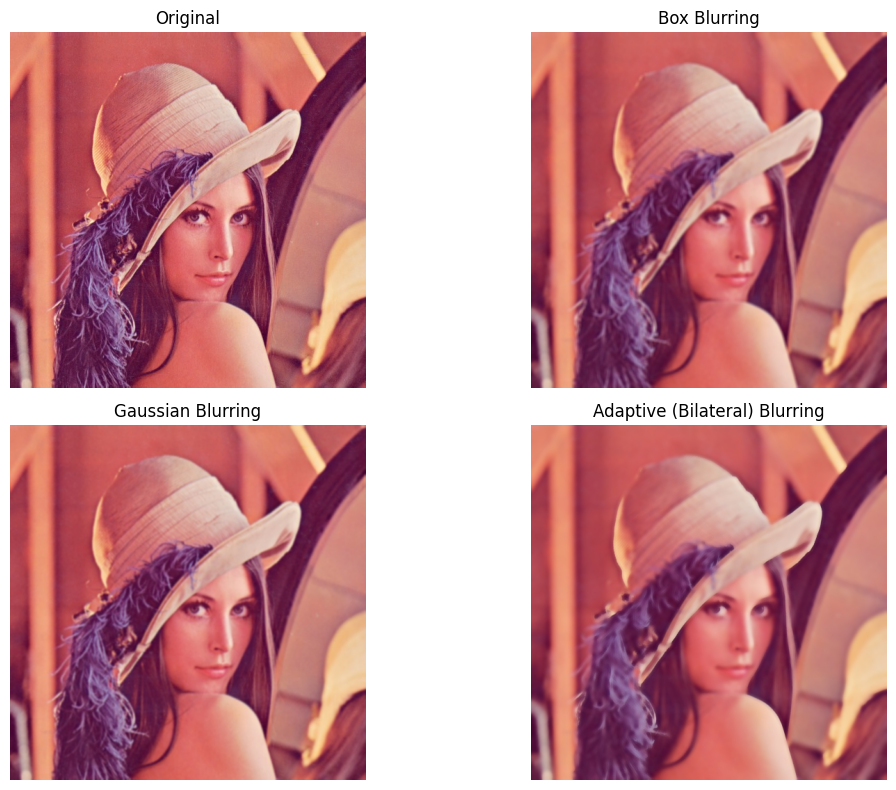

In [ ]:
image_path = '/content/WhatsApp Image 2025-01-14 at 11.16.12.jpeg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


box_blur = cv2.blur(image, (5, 5))


gaussian_blur = cv2.GaussianBlur(image, (5, 5), sigmaX=0)


adaptive_blur = cv2.bilateralFilter(image, d=9, sigmaColor=200, sigmaSpace=200)


titles = ['Original', 'Box Blurring', 'Gaussian Blurring', 'Adaptive (Bilateral) Blurring']
images = [image, box_blur, gaussian_blur, adaptive_blur]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


nb_classifier = GaussianNB()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

nb_cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')


# 1. Naive Bayes
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

# 2. Random Forest
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)


print("Model Performance (80-20 Train-Test Split):")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

print("\nK-Fold Cross-Validation Results (5-Fold):")
print(f"Naive Bayes CV Accuracy: {nb_cv_scores.mean():.4f} ± {nb_cv_scores.std():.4f}")
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")


Model Performance (80-20 Train-Test Split):
Naive Bayes Accuracy: 0.5258
Random Forest Accuracy: 0.9675

K-Fold Cross-Validation Results (5-Fold):
Naive Bayes CV Accuracy: 0.5238 ± 0.0048
Random Forest CV Accuracy: 0.9671 ± 0.0012



Naive Bayes Results:
Accuracy: 0.5258
Precision: 0.6555
Recall: 0.5258
F1-Score: 0.4687
Confusion Matrix:
[[1232    1    6    2    4    2   31    2   40   23]
 [   2 1506    3    5    0    2   12    1   53   16]
 [ 199   33  291  117    5    6  335    0  371   23]
 [ 156   50    9  379    1    5   66    4  580  183]
 [  84    3   14    6  101    4   82    5  364  632]
 [ 195   25    8   12    2   25   45    3  818  140]
 [  22   23    4    1    2    3 1298    0   40    3]
 [   9    8    0   17    9    3    1  329   80 1047]
 [  30  122    2    8    4    2   19    3  846  321]
 [   9    5    6    4    2    1    0   13   26 1354]]
AUC: 0.9012


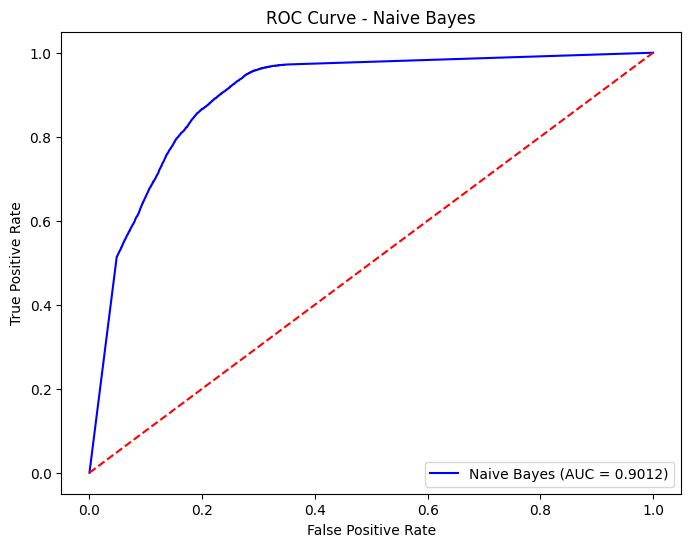


Random Forest Results:
Accuracy: 0.9675
Precision: 0.9675
Recall: 0.9675
F1-Score: 0.9675
Confusion Matrix:
[[1325    0    4    0    1    1    3    1    6    2]
 [   0 1573    6    8    2    0    0    6    3    2]
 [   3    5 1335    5    5    1    9    8    8    1]
 [   1    0   23 1366    0    9    0   14   12    8]
 [   4    1    3    0 1257    0    2    3    3   22]
 [   1    3    3   16    4 1227    8    1    8    2]
 [   5    1    0    0    6   10 1371    0    3    0]
 [   3    5   15    0    7    1    0 1455    2   15]
 [   1    6    8   15    5   11    5    7 1292    7]
 [   4    6    5   16   20    5    1   10    9 1344]]
AUC: 0.9990


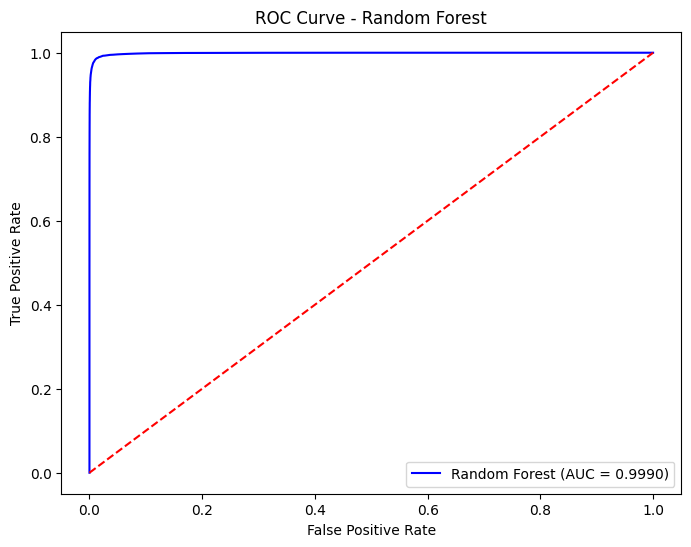

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve, auc
)
from sklearn.preprocessing import StandardScaler, label_binarize
import matplotlib.pyplot as plt


mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target


scaler = StandardScaler()
X = scaler.fit_transform(X)


y_binarized = label_binarize(y, classes=np.unique(y))
n_classes = y_binarized.shape[1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


nb_classifier = GaussianNB()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


nb_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)


nb_pred = nb_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)


def evaluate_model(model_name, y_test, y_pred, y_prob=None):
    print(f"\n{model_name} Results:")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")


    if y_prob is not None:
        fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=np.unique(y)).ravel(), y_prob.ravel())
        roc_auc = auc(fpr, tpr)
        print(f"AUC: {roc_auc:.4f}")


        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})", color='blue')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {model_name}")
        plt.legend(loc="lower right")
        plt.show()


nb_prob = nb_classifier.predict_proba(X_test)
evaluate_model("Naive Bayes", y_test, nb_pred, nb_prob)


rf_prob = rf_classifier.predict_proba(X_test)
evaluate_model("Random Forest", y_test, rf_pred, rf_prob)
